<a target="_blank" href="https://colab.research.google.com/github/gesund-ai/gesund/blob/notebooks/gesund/notebooks/Segmentation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Healthcare Semantic Segmentation Task Notebook

This notebook provides and example of Gesund Validation with Segmentation

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>


To download the required JSON files, run the following commands in a Jupyter notebook cell


In [1]:
# Segmentation Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/semantic_segmentation/gesund_custom_format/gesund_custom_format_annotations_sem_segm.json
# Segmentation Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/semantic_segmentation/gesund_custom_format/gesund_custom_format_predictions_sem_segm.json
# Segmentation Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/semantic_segmentation/test_class_mappings.json

--2024-11-04 13:18:04--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/semantic_segmentation/gesund_custom_format/gesund_custom_format_annotations_sem_segm.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68921 (67K) [text/plain]
Saving to: ‘gesund_custom_format_annotations_sem_segm.json.1’

gesund_custom_forma 100%[===================>]  67.31K  --.-KB/s    in 0.01s   

2024-11-04 13:18:04 (5.34 MB/s) - ‘gesund_custom_format_annotations_sem_segm.json.1’ saved [68921/68921]

--2024-11-04 13:18:05--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/semantic_segmentation/gesund_custom_format/gesund_custom_format_predictions_sem_segm.json
Resolving raw.githubusercontent.com (raw.githubusercontent.co

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `semantic segmentation validation` on your data. 

In [2]:
# import the required libraries
from gesund.validation import run_metrics, plotting_metrics
import pprint
import os

In [ ]:
BASE_PATH = os.path.join(os.path.expanduser('~'), 'gesund/gesund/notebooks')
# provide the json files for respective values
args = {
    'annotations_json_path': os.path.join(BASE_PATH, 'gesund_custom_format_annotations_sem_segm.json'),
    'predictions': os.path.join(BASE_PATH, 'gesund_custom_format_predictions_sem_segm.json'),
    'class_mappings': os.path.join(BASE_PATH, 'test_class_mappings.json'),
    'problem_type': 'semantic_segmentation',
    'format': 'json_format',
    'write_results_to_json': True
}

### Argument breakdown



The argumment input consists of the data path and parameters.

1. Annotation data: `annotations_json_path`:  the path of the json file containing the annotation data with respect to the images.
The structure of the annotation should be as follows

```
{
   "image_id_value": {
	"image_id": image_id_value,
	"annotation": [
	  {
		"image_id": "image_id_value",
		"label": integer_class_value,
		"type": "mask",
		"measurement_info": {
			"objectName": "mask",
			"measurement": "Segmentation"
		},
		"mask": {
			"mask": "RLE string of the mask"
		},
		"shape": [width, height],
		"window_level": Null
	  },
	   ...
	]
   }
}
```


2. Prediction: `predictions`: the json file path containing the prediction data with respect to the images.
The structure of the prediction could be as follows, if the input data is from the 

```
{
   "image_id_value": {
	"image_id": "image_id_value",
	"shape": [width, height],
	"masks": {
		"rles": [
			{
				"rle": "RLE encoded string",
				"class": integer label
			},
			...
		]
	},
    },
    ...
}

```

3. Label dictionary: `class_mappings`: Label mapping of the class labels

```
{"0": "red blood cell", "1": "trophozoite", "2": "schizont", "3": "difficult", "4": "ring", "5": "leukocyte"}
```

4. Problem Type: `problem_type`: Type of the problem in this context is `object_detection` 

5. Format: `format`: Format of the json file could be 'coco', 'yolo' or 'gesund_format'. The prior two are standards as followed in general and the last format is as explained in point 1 and 5.

6. Write results: `write_results_to_json`: boolean value to write the results in json file

## <a id="results">Explore Results</a>

### Results breakdown

Metadata file not provided!
Loss not found.


Calling all plot functions:   0%|          | 0/9 [00:00<?, ?it/s]

Calling method: plot_blind_spot_metrics...


Calling all plot functions:  11%|█         | 1/9 [00:03<00:29,  3.64s/it]

Calling method: plot_highlighted_overall_metrics...


Calling all plot functions:  22%|██▏       | 2/9 [00:05<00:16,  2.35s/it]

Calling method: plot_iou_distribution...
Calling method: plot_main_metric...


Calling all plot functions:  44%|████▍     | 4/9 [00:06<00:06,  1.34s/it]

Calling method: plot_meta_distribution...
Calling method: plot_metrics_by_meta_data...
Calling method: plot_statistics_classbased_table...


Calling all plot functions: 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]


Calling method: plot_top_misses...
Calling method: plot_violin_graph...


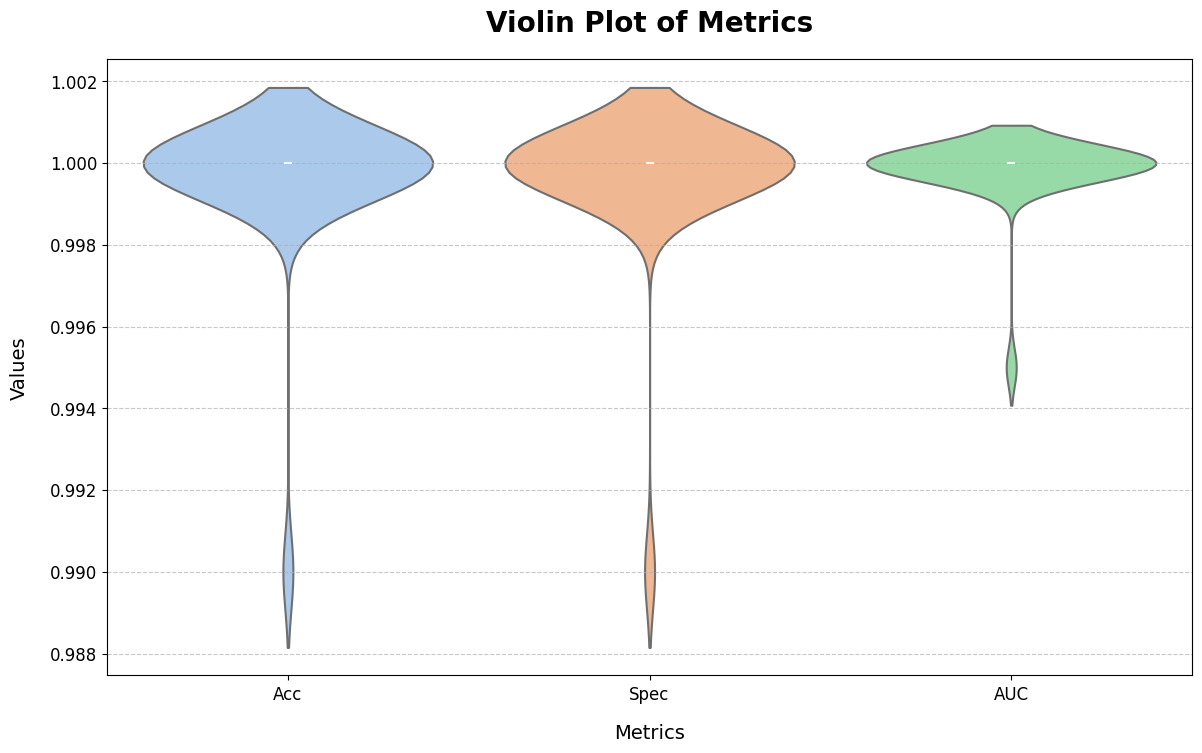

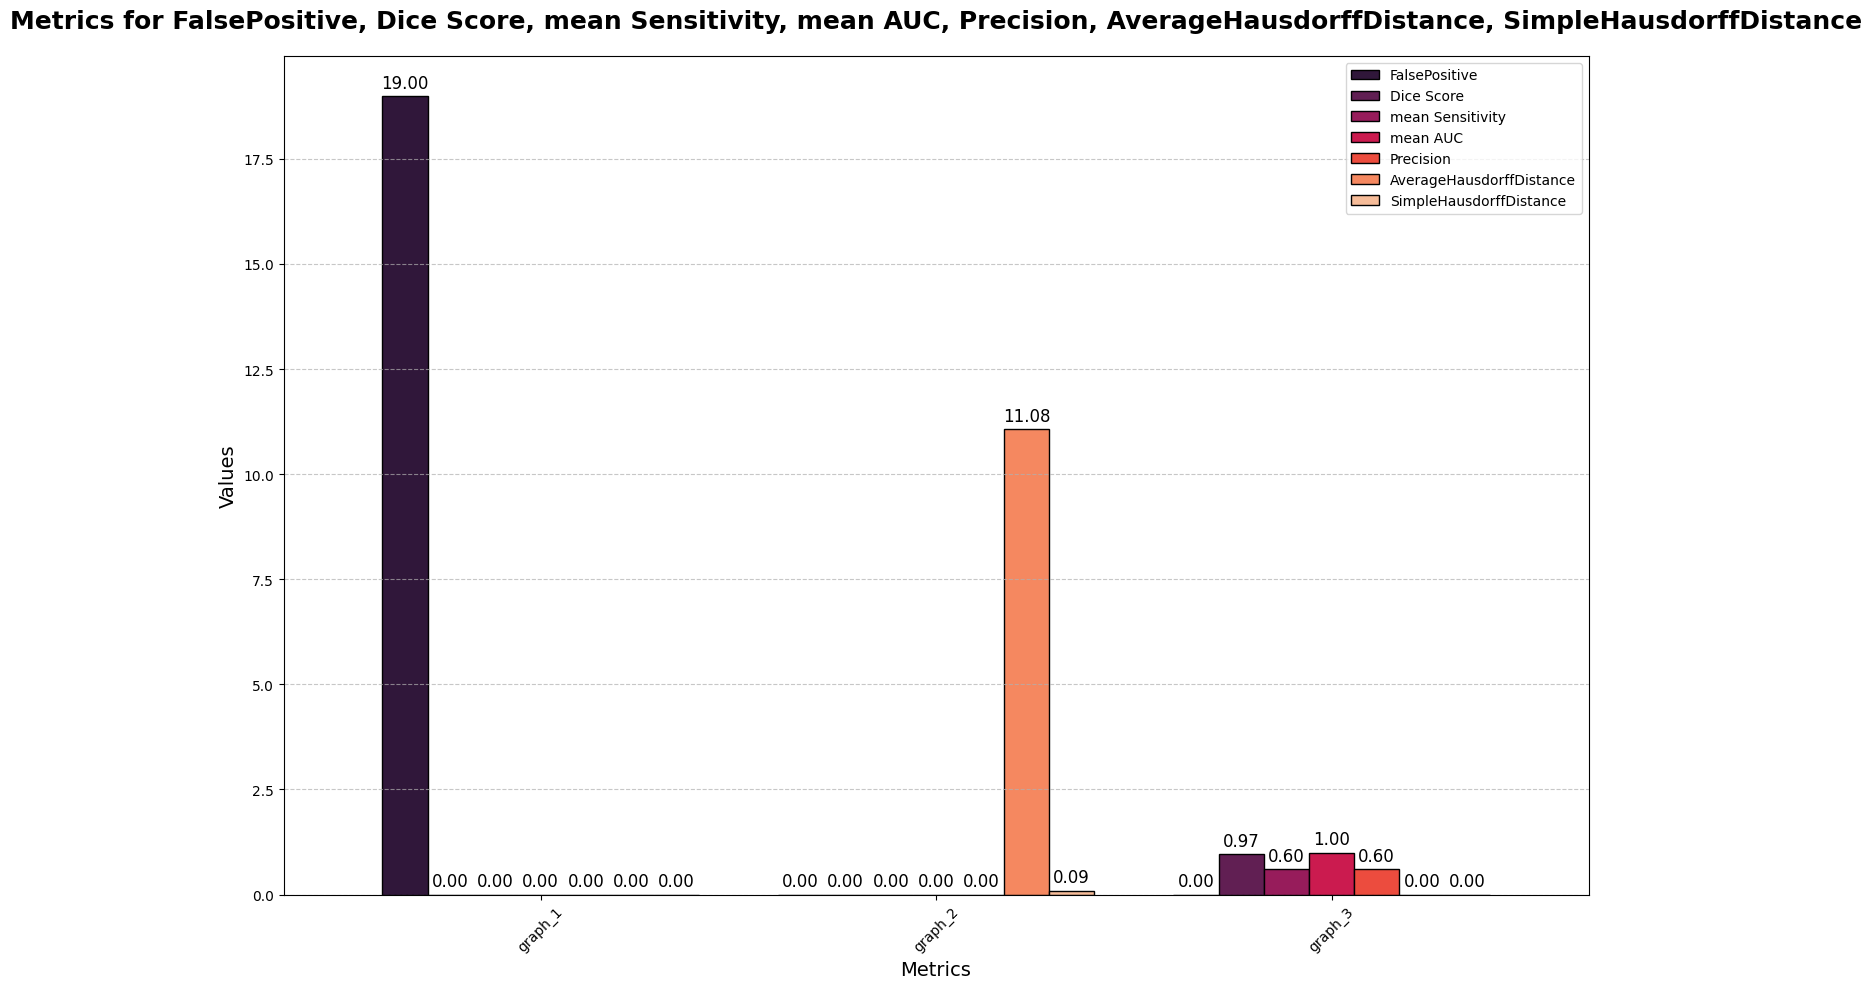

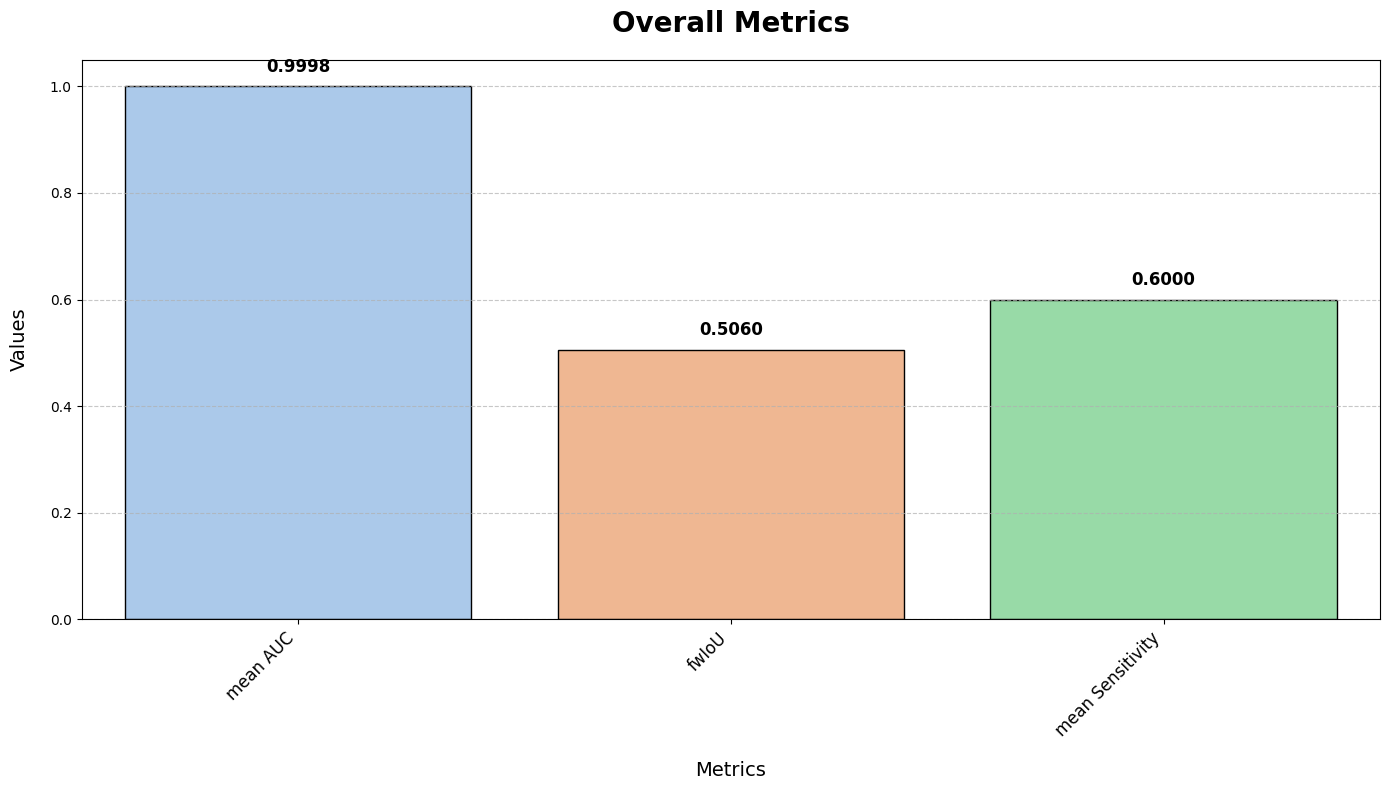

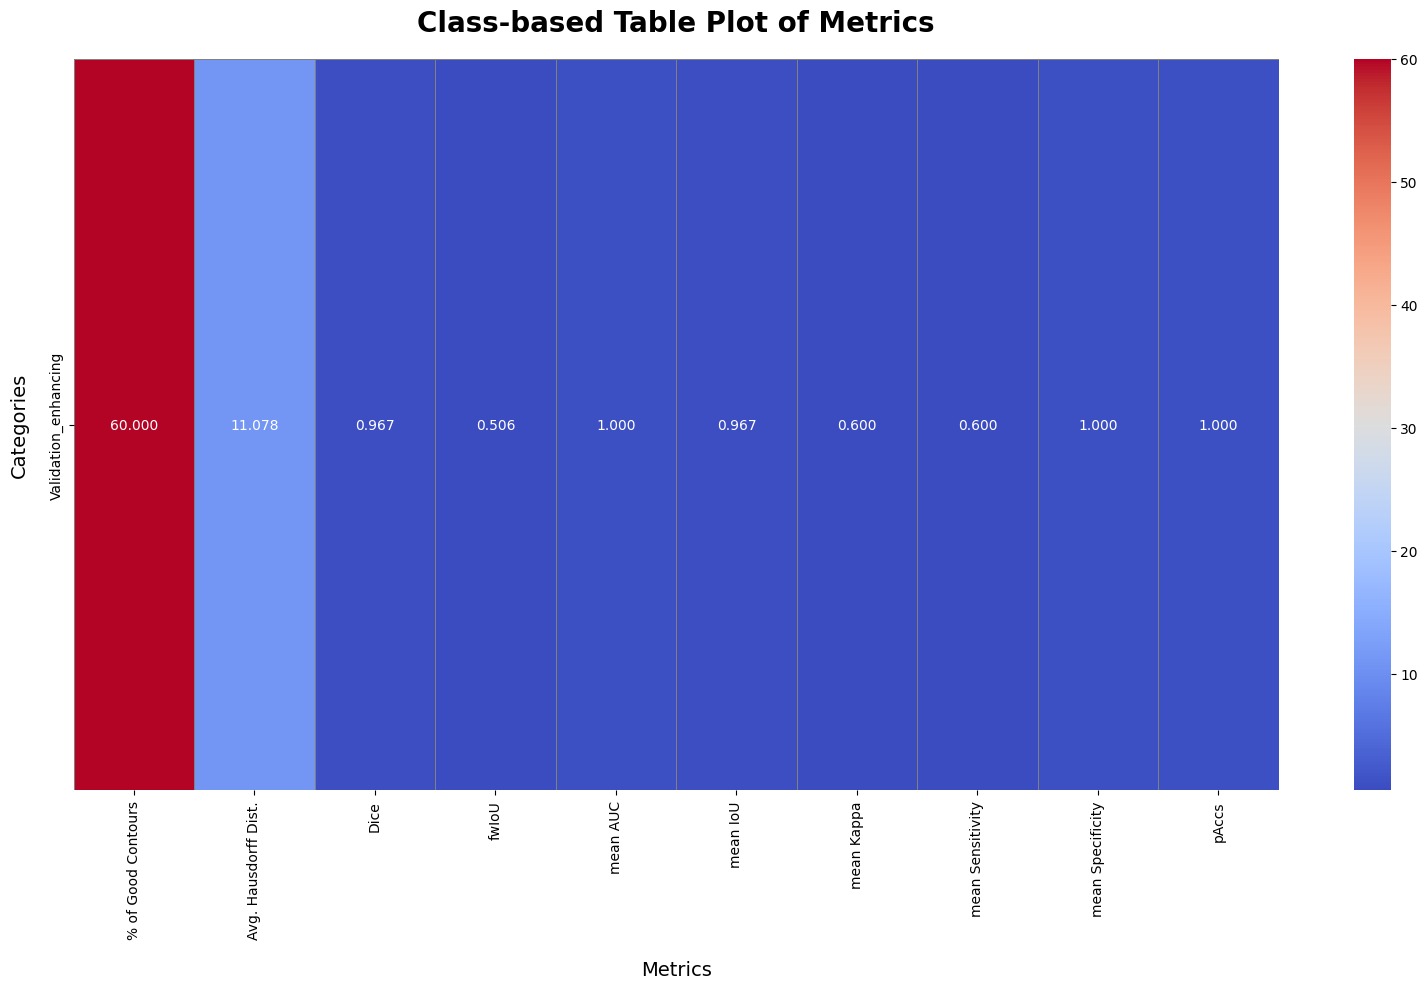

<Figure size 1400x800 with 0 Axes>

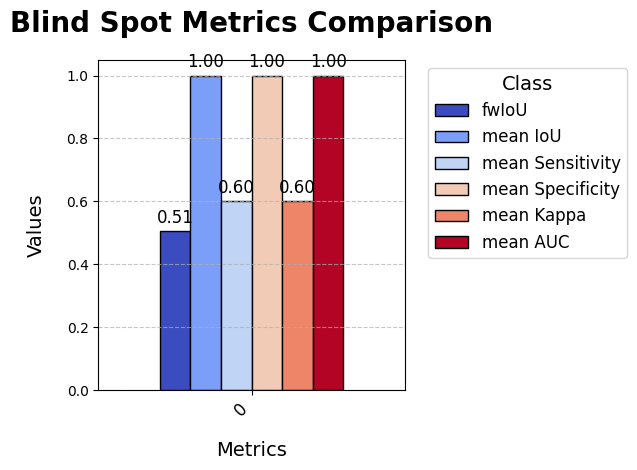

In [4]:
# execute the validation metrics
result = run_metrics(args)
args["plot_configs"] = {
        'violin_graph': {'metrics':['Acc', 'Spec','AUC'], 'threshold': 0.5}, 
        'plot_by_meta_data': {'meta_data_args': [ 'FalsePositive','Dice Score','mean Sensitivity','mean AUC','Precision','AverageHausdorffDistance','SimpleHausdorffDistance']}, 
        'overall_metrics': {'overall_args': ['mean AUC', 'fwIoU','mean Sensitivity']}, 
        'classbased_table': {'classbased_table_args': 0.5}, 
        'blind_spot': {'blind_spot_args': ['fwIoU','mean IoU','mean Sensitivity','mean Specificity','mean Kappa','mean AUC','']}, 
    }
plotting_metrics(result, args)

When you run the above cell, logs will appear stating the progress of the validation execution. The results could be explained, the `results` returned by the `run_metrics` and the `outputs` folder produced in the process are the same only in different forms. To understand in detail about what validation metrics mean, please visit the explaination <a href="https://gesund-ai.github.io/validation_metrics.html">here</a>


Following is the directory structure of the folder.
```
-- outputs
 |- batch_job_id  
   |- plot_jsons  # json files
      |- main_metric.json
      ...
   |- plot 
      |- blind_spot.png
      ... 
```


Results: `results`: consists of following keys 
- `plot_blind_spot_metrics`: contains the data for bar plots to consisting of metrics like fwIOU, mean IoU, mean sensitivity, mean specificity, mean kappa, and mean AUC
- `plot_highlighted_overall_metrics`: contains the data for plotting mean average preicion and recall at specific thresholds
- `plot_iou_distribution`: contains the data to plot bar plot for false positive, dice score, mean sensitivit, mean AUC, precision, average Hausdorff distance, simple hausdorff distance
- `plot_main_metric`: data to plot the mean average precision value at 10 threshold.
- `plot_meta_distribution`: contains the data for plotting bar charts where the data is plotted only when metadata is available in the input
- `plot_metrics_by_meta_data`: 
- `plot_statistics_classbased_table`: The class based table metrics provides the bar chart information for each class involved in the validation metrics like % of good contours, average Haundroff distance, DICE, fwIoU, mean AUC, mean IoU, mean Kappa, mean sensitivity, mean specificity, and mean Kappa
- `plot_top_misses`: ranks the top images corresponding to the mean intersection over union values.
- `plot_violin_graph`: contains the data to plots the distribution of accuracy, specificity and AUC
- `problem_type`: string value indicating the problem type 
- `batch_job_id`: batch job id value identifier 
- `successful_batch_data`: the input prediction data
- `annotation_data`: the input annotation data
- `meta_data`: the input metadata
- `class_mappings`: the input class mappings
- `format`: the input json format
- `output_dir`: the path where the output folder is stored

### Output JSON file breakdown

The JSON files are found under the 

```
outputs/
|- batch_job_id
   |- plot_jsons
```

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os

In [6]:
batch_id = result["batch_job_id"]
folder_path = os.path.join(*["outputs", batch_id, "plot_jsons"])
folder_path

'outputs/6728c99f75c62d4e442ffe65/plot_jsons'

As mentioned above the JSON files contains the same data as in the result variable. The files are provided for persistent storage of data.

### Output plot breakdown

The plots could be found under the following folder location

```
outputs/
|- batch_job_id
   |- plots
```

In [7]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [8]:
batch_id = result["batch_job_id"]
image_folder = os.path.join(*["outputs", batch_id, "plots"])

def load_image(image_file):
    img_path = os.path.join(image_folder, image_file) 
    img = mpimg.imread(img_path) 
    plt.imshow(img)
    plt.axis("off")

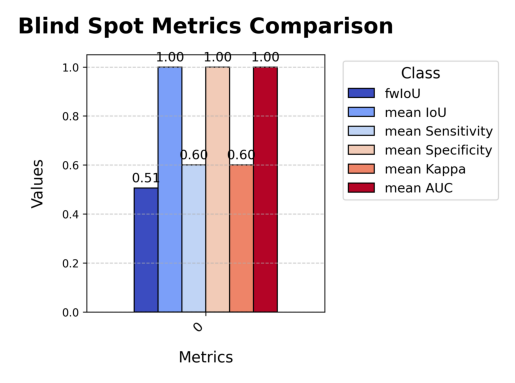

In [9]:
load_image("blind_spot.png")

`Blind spot metrics comparison` consisting of metrics like fwIOU, mean IoU, mean sensitivity, mean specificity, mean kappa, and mean AUC

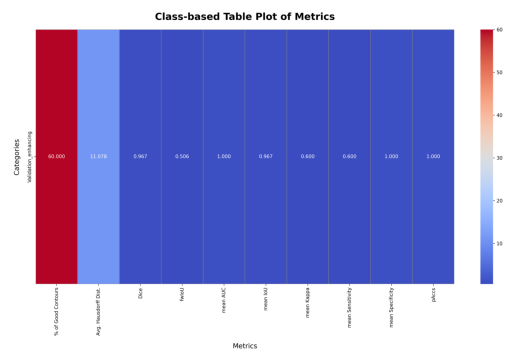

In [10]:
load_image("classbased_table.png")

`Class-based Table metrics` The class based table metrics provides the bar chart information for each class involved in the validation metrics like % of good contours, average Haundroff distance, DICE, fwIoU, mean AUC, mean IoU, mean Kappa, mean sensitivity, mean specificity, and mean Kappa

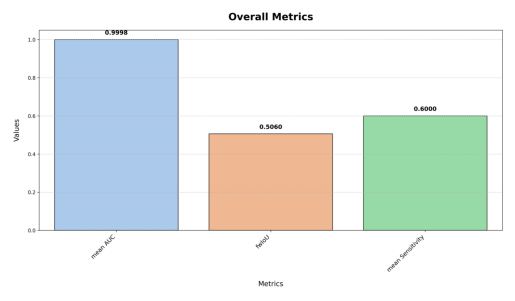

In [11]:
load_image("overall_metrics.png")

`Overall metrics` The plot describes the overall metrics like mean AUC, fwIOU, mean sensitivity

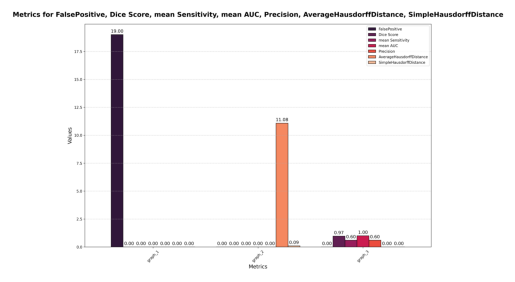

In [12]:
load_image("plot_by_meta_data.png")

`Plot by meta data` plots bar plot for false positive, dice score, mean sensitivit, mean AUC,
precision, average Hausdorff distance, simple hausdorff distance

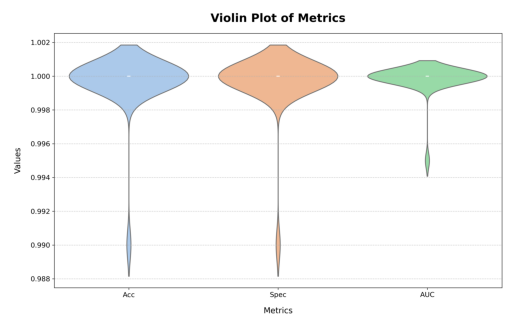

In [13]:
load_image("violin_graph.png")

`Violin plot of metrics` plots the distribution of accuracy, specificity and AUC